In [1]:
import numpy as np
import pandas as pd
import statsmodels

from pandas import Series, DataFrame
from numpy.random import randn

In [2]:
# Stats
from scipy import stats
#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# simple plot, jointplot

In [3]:
dataset1 = randn(100)

(array([ 1.,  5.,  3., 17., 24., 17., 21.,  8.,  3.,  1.]),
 array([-2.93548969, -2.36840739, -1.80132508, -1.23424278, -0.66716047,
        -0.10007817,  0.46700414,  1.03408644,  1.60116875,  2.16825105,
         2.73533336]),
 <a list of 10 Patch objects>)

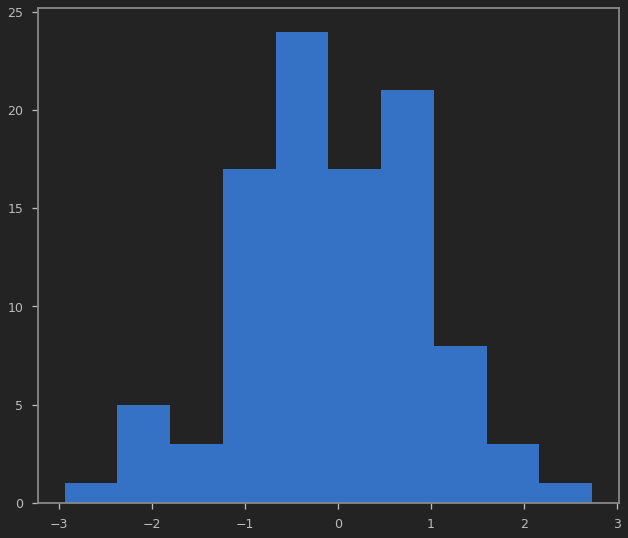

In [4]:
plt.hist(dataset1)

(array([ 4.,  3.,  6., 15., 20., 18.,  7.,  3.,  3.,  1.]),
 array([-2.24548998, -1.79369656, -1.34190314, -0.89010972, -0.4383163 ,
         0.01347712,  0.46527054,  0.91706396,  1.36885739,  1.82065081,
         2.27244423]),
 <a list of 10 Patch objects>)

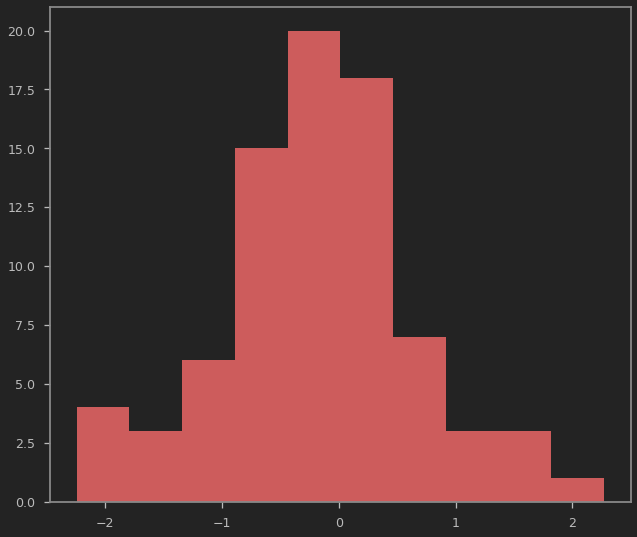

In [5]:
dataset2 =randn(80)
plt.hist(dataset2,color='indianred')

(array([0.16600507, 0.05533502, 0.11067005, 0.05533502, 0.16600507,
        0.16600507, 0.2213401 , 0.60868527, 0.33201015, 0.77469034,
        0.27667512, 0.71935532, 0.27667512, 0.11067005, 0.        ,
        0.16600507, 0.        , 0.16600507, 0.        , 0.05533502]),
 array([-2.24548998, -2.01959327, -1.79369656, -1.56779985, -1.34190314,
        -1.11600643, -0.89010972, -0.66421301, -0.4383163 , -0.21241959,
         0.01347712,  0.23937383,  0.46527054,  0.69116725,  0.91706396,
         1.14296068,  1.36885739,  1.5947541 ,  1.82065081,  2.04654752,
         2.27244423]),
 <a list of 20 Patch objects>)

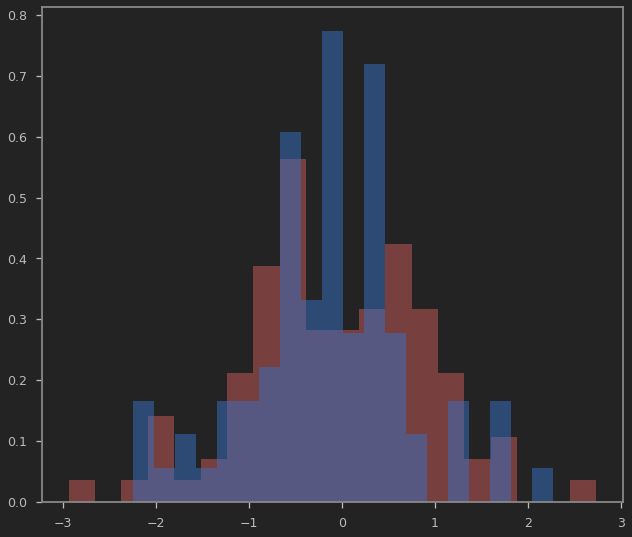

In [6]:
plt.hist(dataset1,density=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,density=True,alpha=0.5,bins=20)

In [7]:
data1 = randn(1000)
data2 = randn(1000)

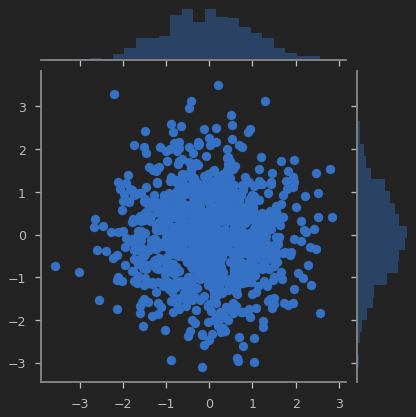

In [8]:
sns.jointplot(data1,data2)

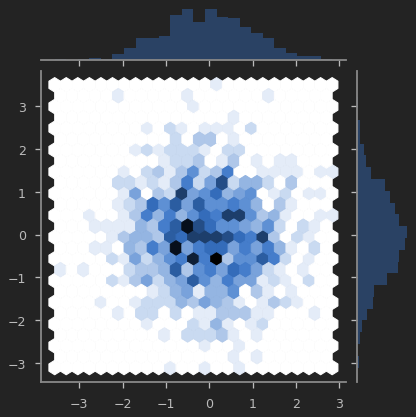

In [9]:
sns.jointplot(data1,data2,kind='hex')

# Kernel density estimation plot

In [10]:
dataset =randn(25)

(0, 1)

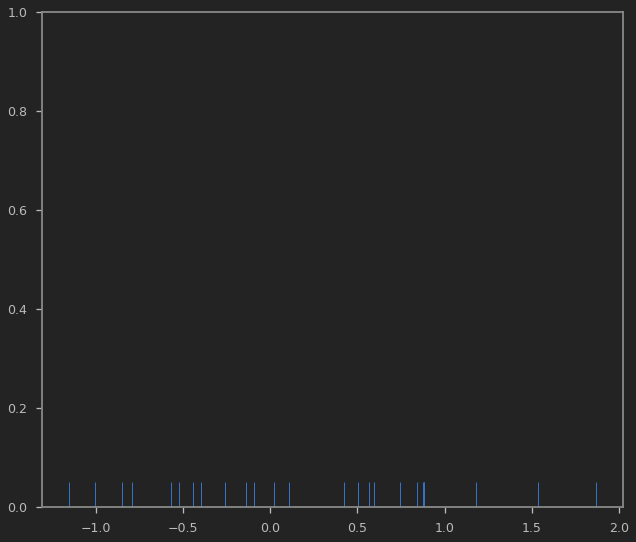

In [11]:
sns.rugplot(dataset)
plt.ylim(0,1)

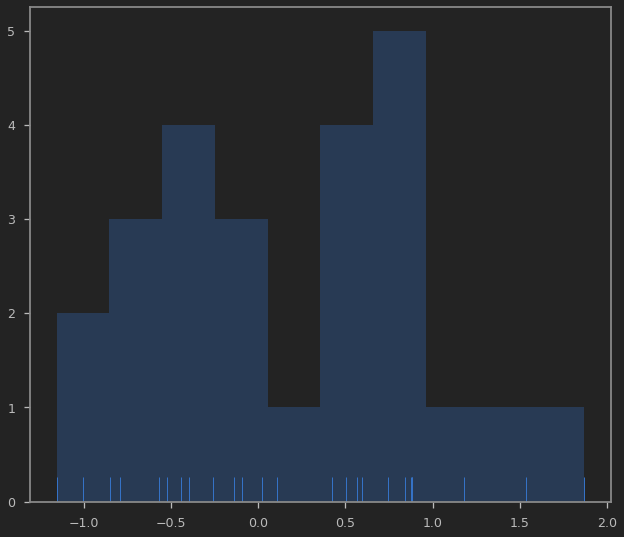

In [12]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

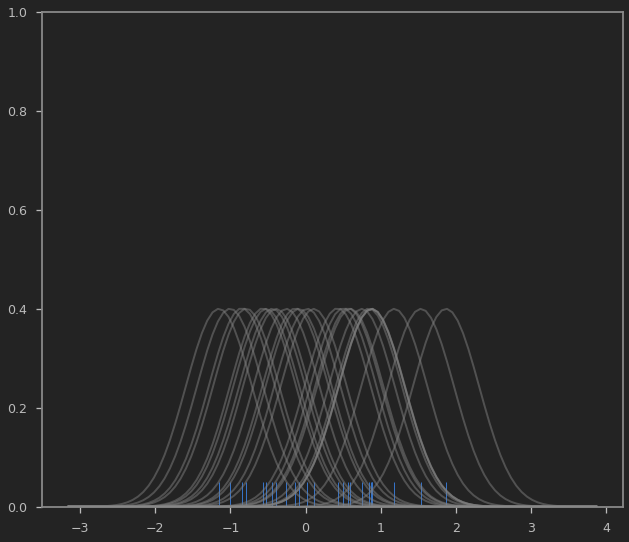

In [13]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2
#set axis from xmin to xmax
x_axis = np.linspace(x_min,x_max, 100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset)) )** 0.2

kernel_list =[]

for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel/kernel.max()
    kernel = kernel*0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

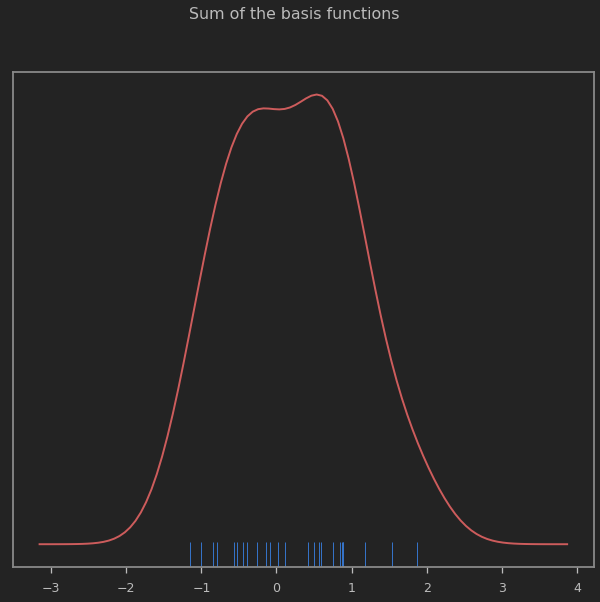

In [14]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

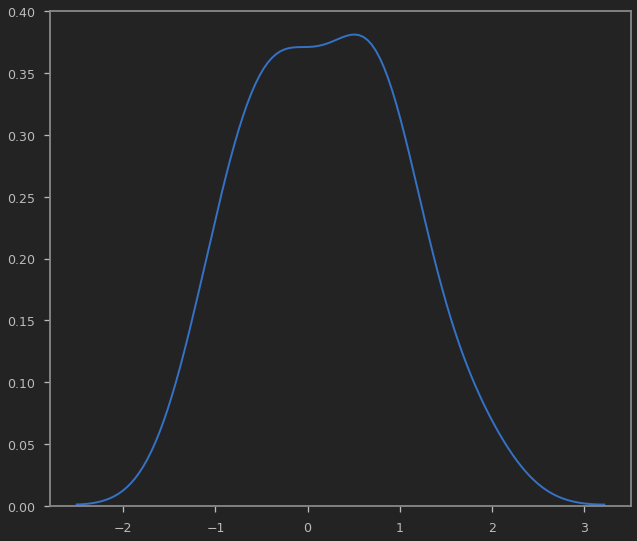

In [15]:
sns.kdeplot(dataset)

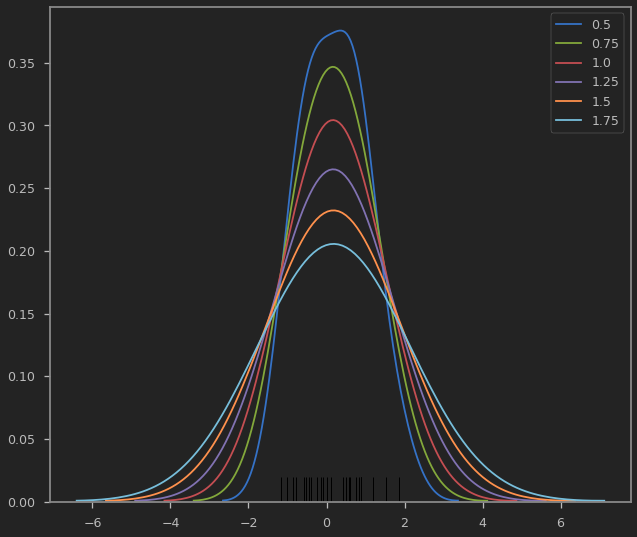

In [16]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

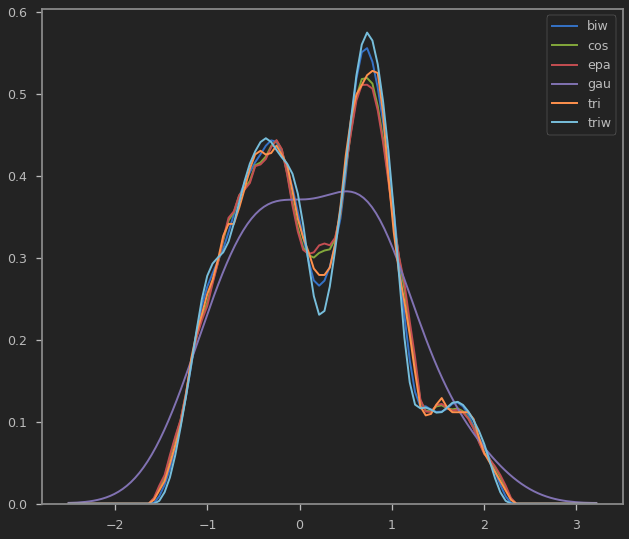

In [17]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

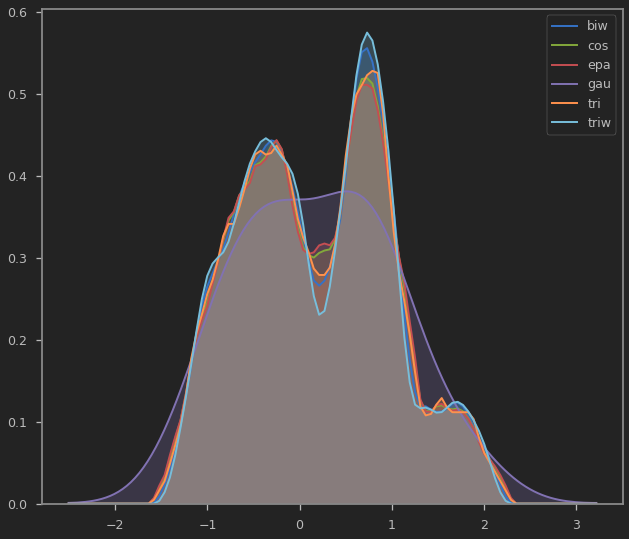

In [18]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

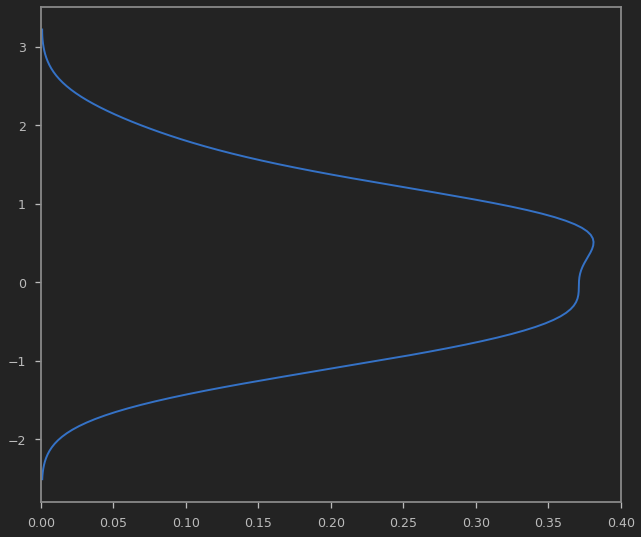

In [19]:
sns.kdeplot(dataset,vertical=True)

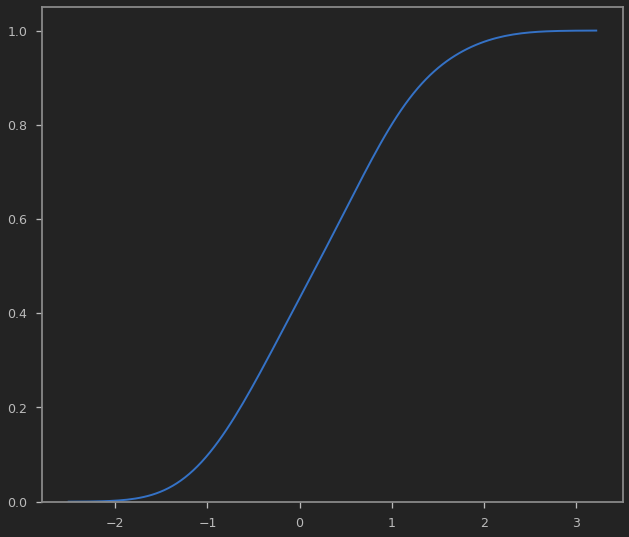

In [20]:
sns.kdeplot(dataset,cumulative=True)

/home/vinhngo/miniconda3/envs/sp/lib/python3.7/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


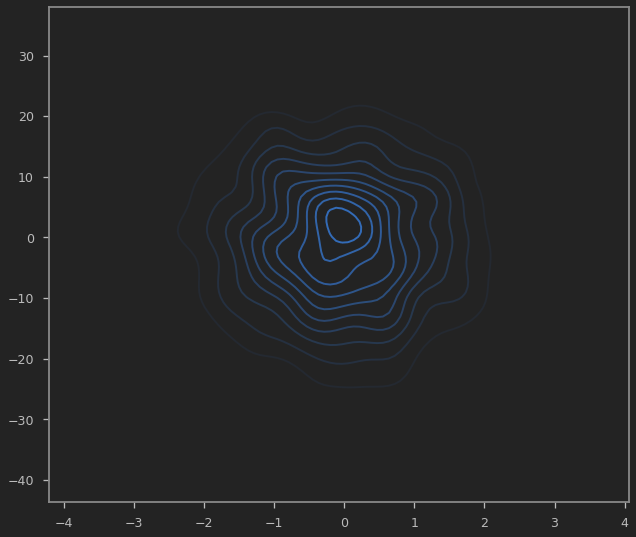

In [21]:
# Multidimension data
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe)

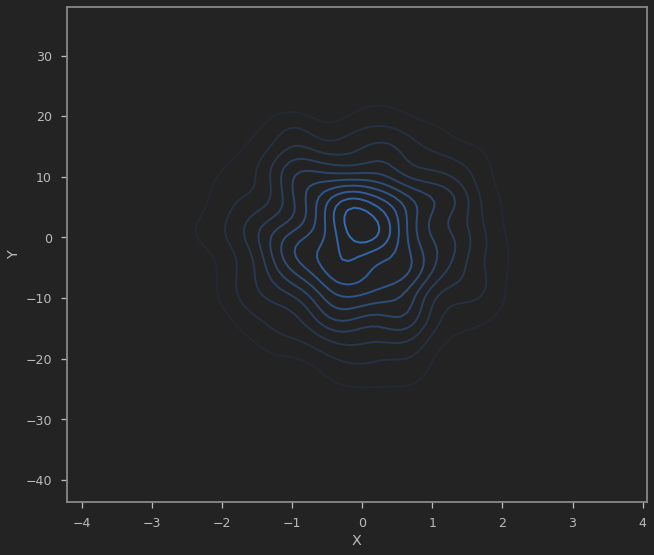

In [22]:
sns.kdeplot(dframe.X,dframe.Y)

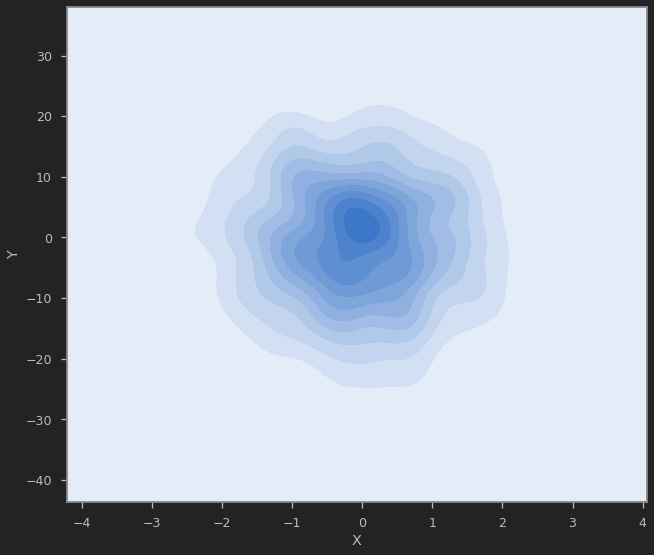

In [23]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

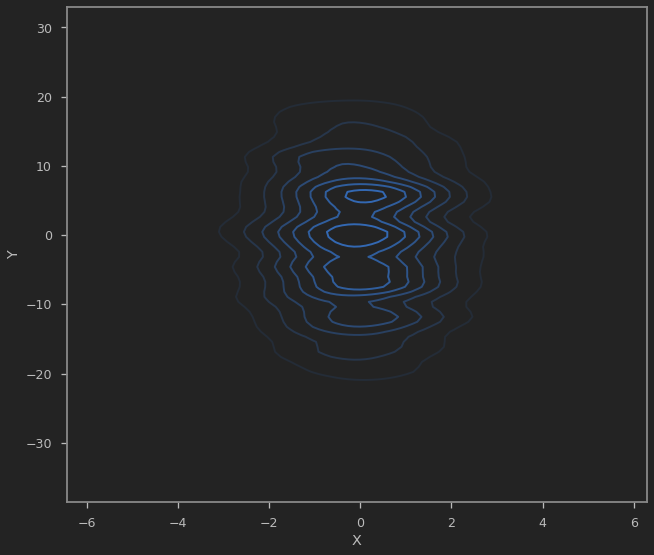

In [24]:
sns.kdeplot(dframe.X,dframe.Y,bw=1)

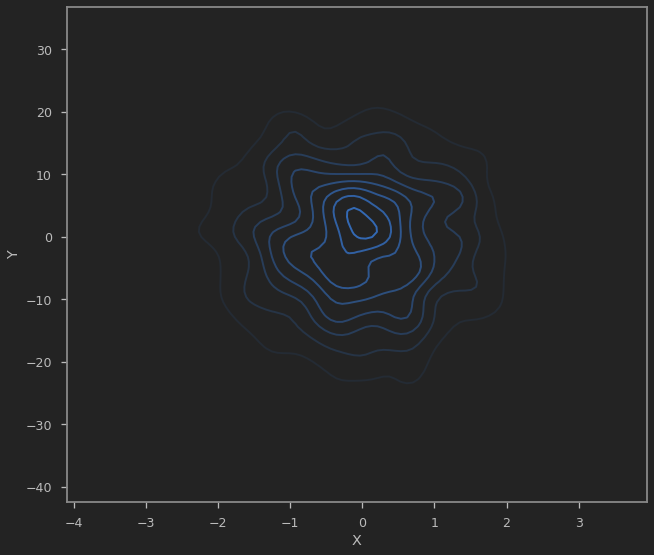

In [25]:
sns.kdeplot(dframe.X,dframe.Y,bw='silverman')

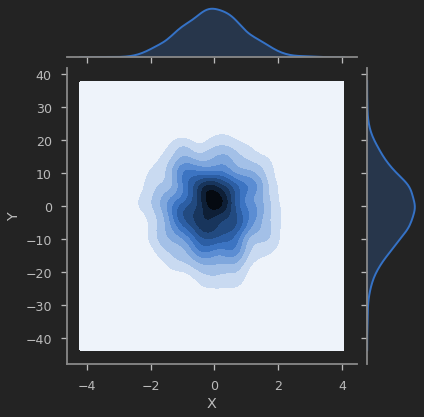

In [26]:
sns.jointplot('X','Y',dframe,kind='kde')

# Combining plot style

In [27]:
dataset = randn(100)

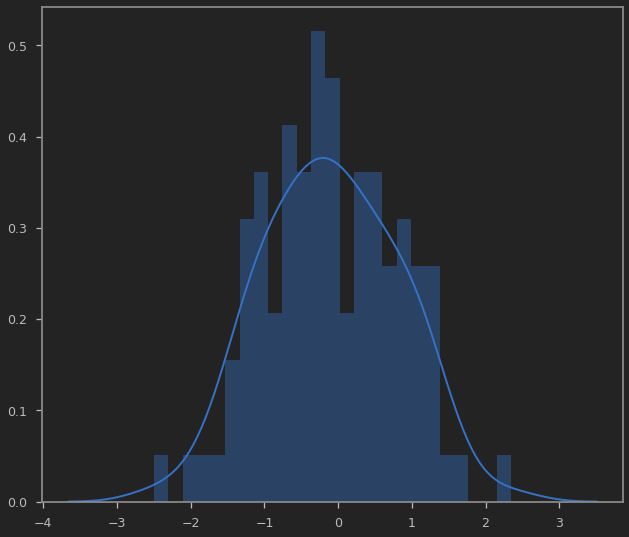

In [28]:
sns.distplot(dataset,bins=25)

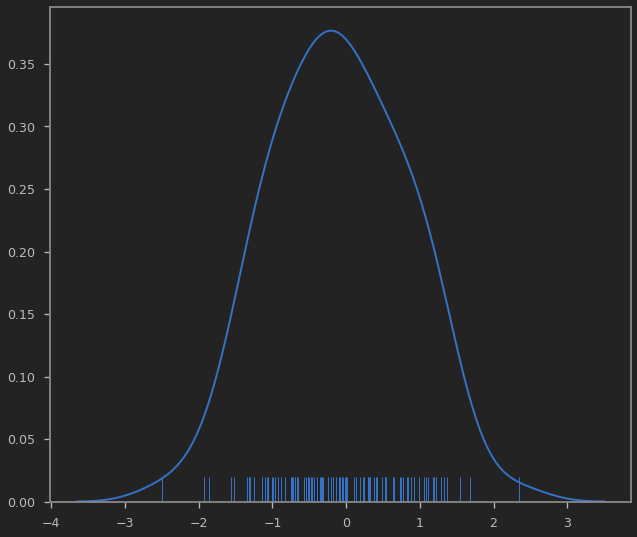

In [29]:
sns.distplot(dataset,bins=25,rug=True,hist=False)

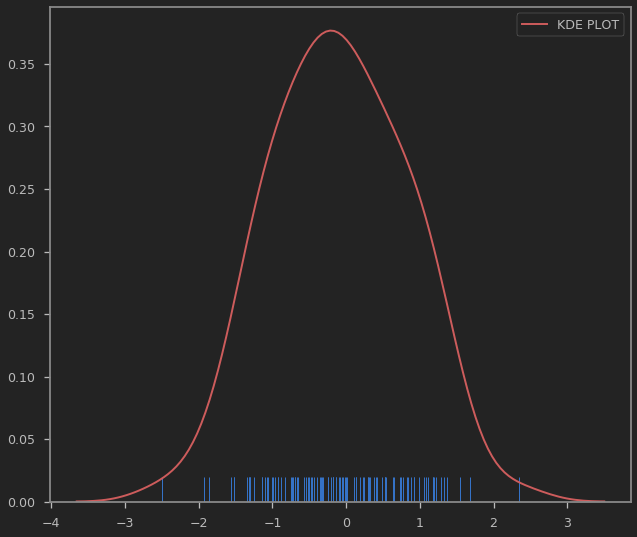

In [30]:
sns.distplot(dataset,bins=25,rug=True,hist=False,
    kde_kws={'color':'indianred','label':'KDE PLOT'},
    hist_kws={'color':'blue','label':'HIST'})

In [31]:
from pandas import Series
ser1= Series(dataset,name='My_data')
ser1

0    -1.929090
1    -0.174468
2     1.538710
3    -0.830434
4    -0.718937
        ...   
95   -1.145394
96    0.248703
97    1.087034
98   -0.143201
99   -1.304741
Name: My_data, Length: 100, dtype: float64

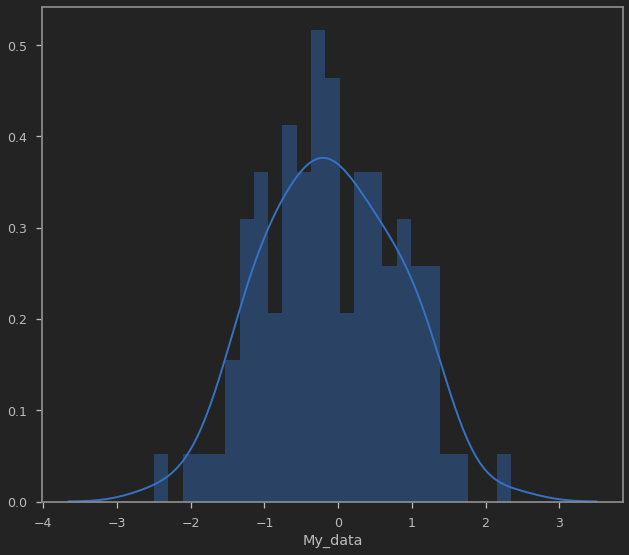

In [32]:
sns.distplot(ser1,bins=25)

# Box and violin plot

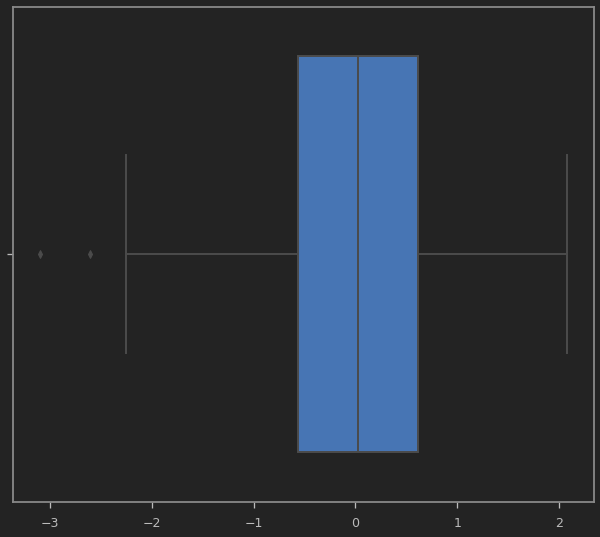

In [33]:
data1 = randn(100)
data2 =randn(100)
sns.boxplot([data1,data2])

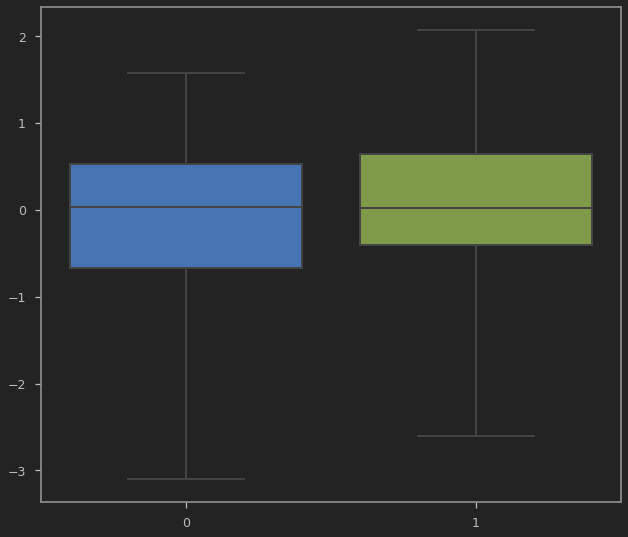

In [34]:
sns.boxplot(data=[data1,data2],whis=np.inf)

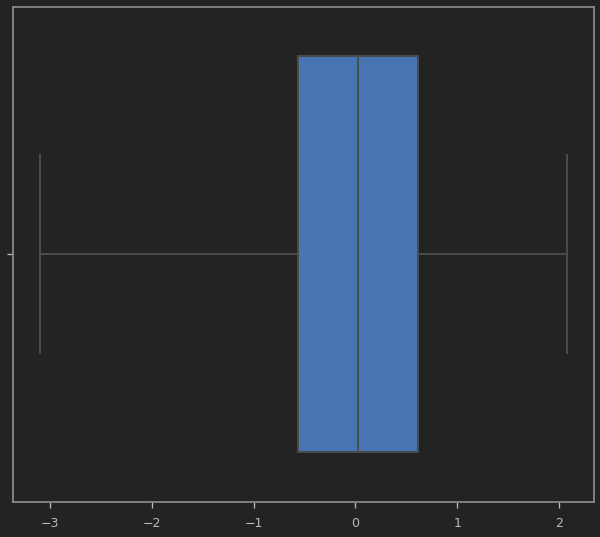

In [35]:
sns.boxplot([data1,data2],whis=np.inf)

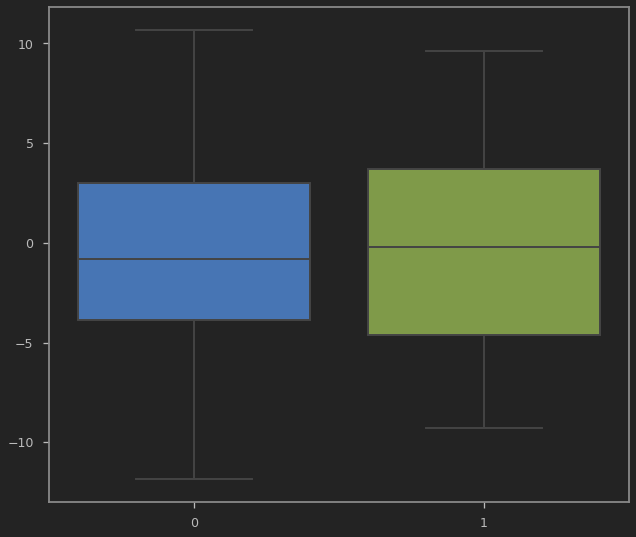

In [36]:
data1 =stats.norm(0, 5).rvs(100)
data2=np.concatenate([stats.gamma(5).rvs(50)-1,
                     -1*stats.gamma(5).rvs(50)])

sns.boxplot(data=[data1,data2],whis=np.inf)

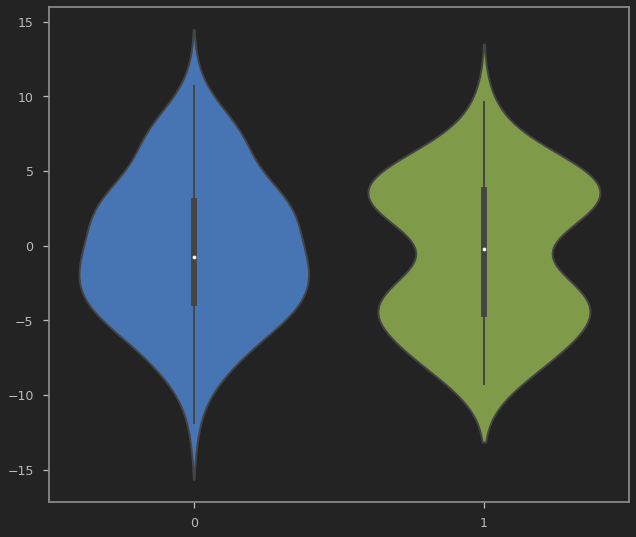

In [37]:
sns.violinplot(data=[data1,data2])

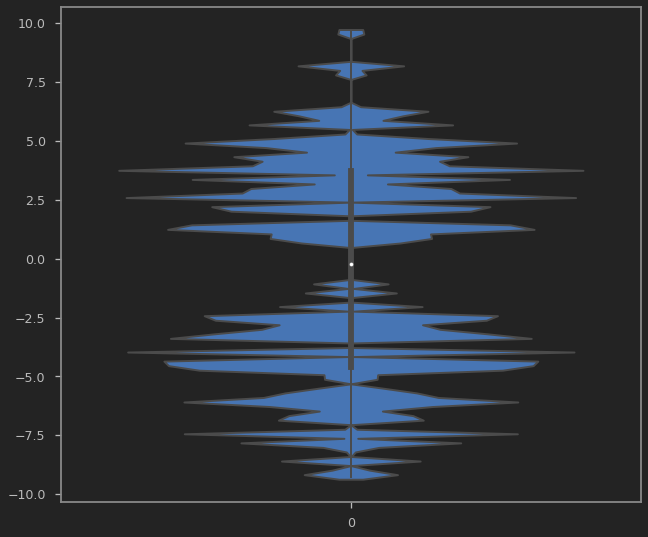

In [38]:
sns.violinplot(data=data2,bw=0.01)

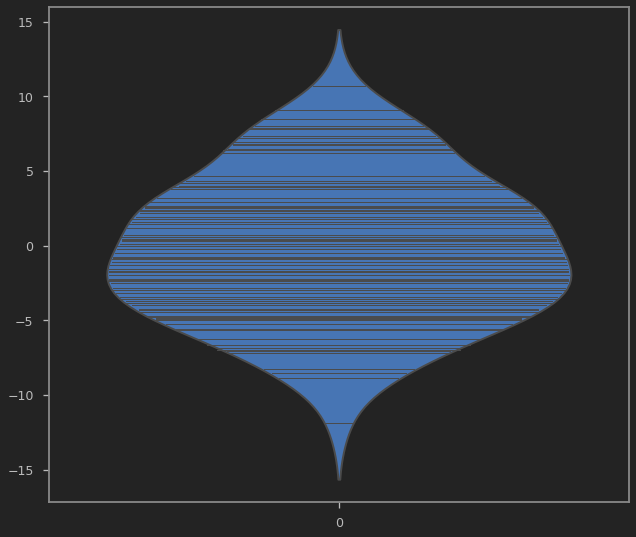

In [39]:
sns.violinplot(data=data1,inner='stick')

# Regression plot

In [40]:
tips = sns.load_dataset('tips')

In [41]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


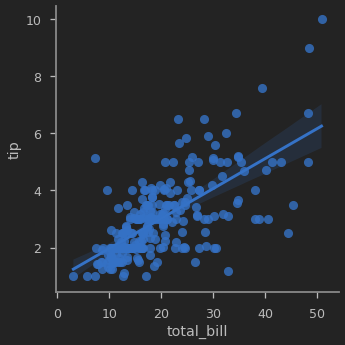

In [42]:
sns.lmplot('total_bill','tip',tips)

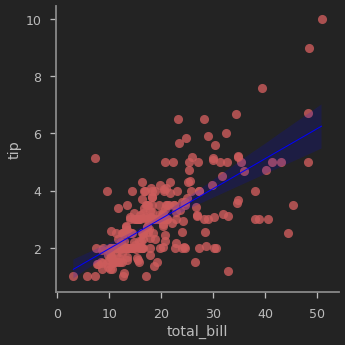

In [43]:
sns.lmplot('total_bill','tip',tips,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

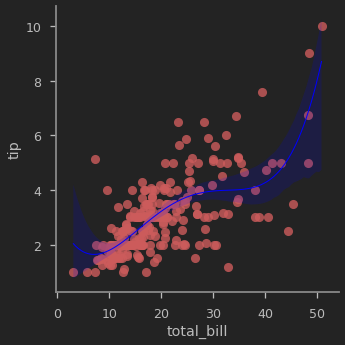

In [44]:
sns.lmplot('total_bill','tip',tips,order=4,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

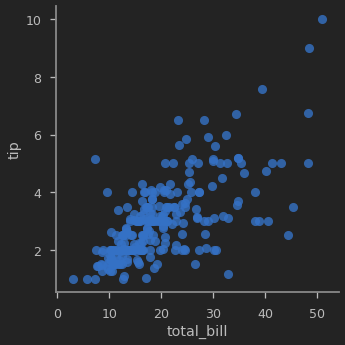

In [45]:
sns.lmplot('total_bill','tip',tips,fit_reg=False)

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
tips['tip_pect']=100*(tips['tip']/tips['total_bill'])

In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


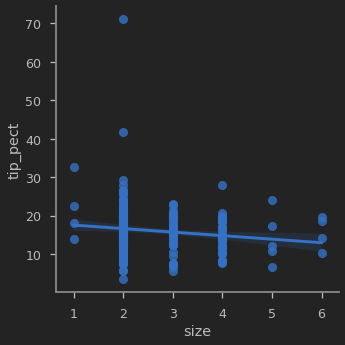

In [49]:
sns.lmplot('size','tip_pect',tips)

In [50]:
# Google Jitter

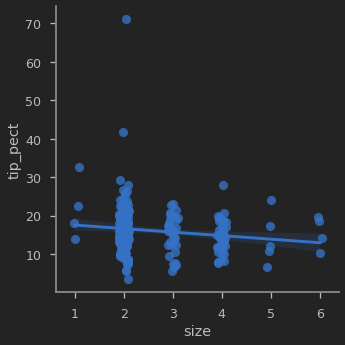

In [51]:
sns.lmplot('size','tip_pect',tips,x_jitter=.1)

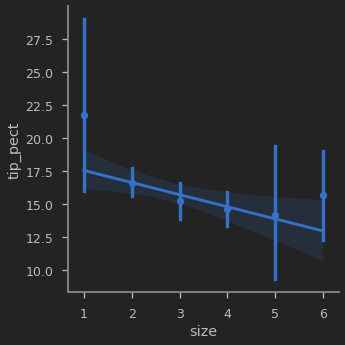

In [52]:
sns.lmplot('size','tip_pect',tips,x_estimator=np.mean)

ValueError: markers must be a singeton or a list of markers for each level of the hue variable

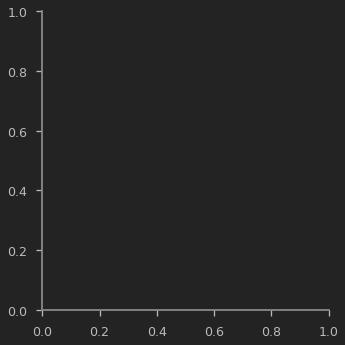

In [68]:
sns.lmplot('total_bill','tip_pect',tips,hue='sex',markers=['x','o'])

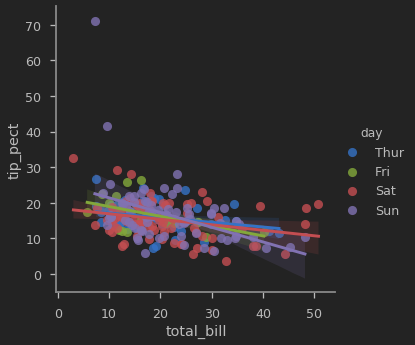

In [54]:
sns.lmplot('total_bill','tip_pect',tips,hue='day')

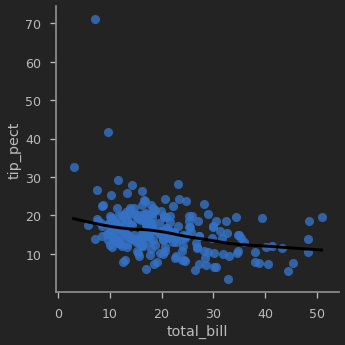

In [55]:
sns.lmplot('total_bill','tip_pect',tips,lowess=True,line_kws={'color':'black'})

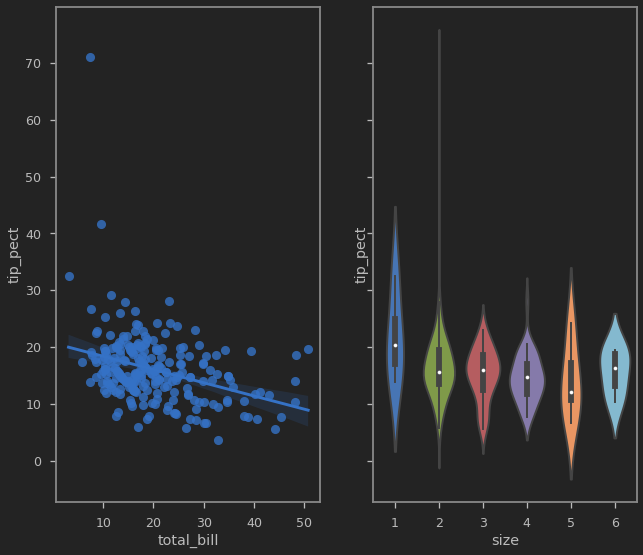

In [67]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True) 
sns.regplot('total_bill','tip_pect',tips,ax=ax1)
sns.violinplot(tips['size'],tips['tip_pect'],palete='Reds_r',ax=ax2)

# Heat map and cluster matrix

In [69]:
flight_dframe = sns.load_dataset('flights')

In [71]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [73]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [74]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


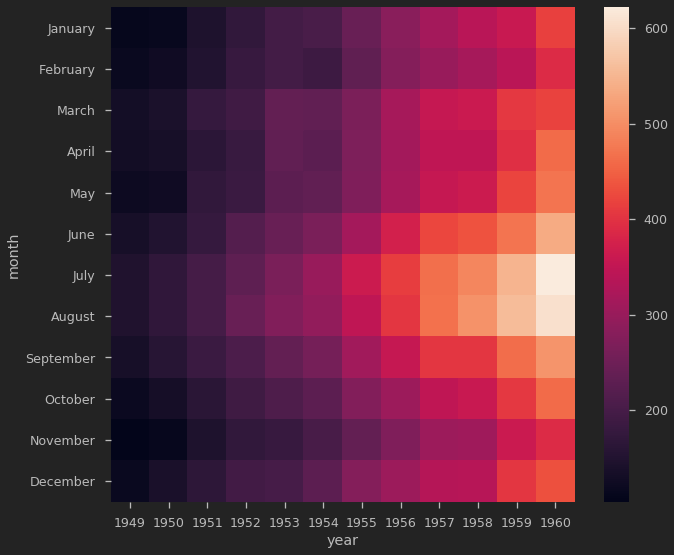

In [75]:
sns.heatmap(flight_dframe)

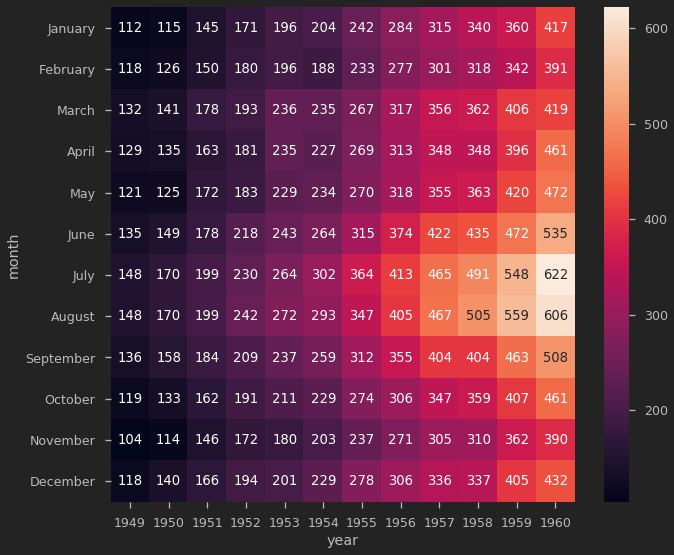

In [76]:
sns.heatmap(flight_dframe,annot=True,fmt='d')

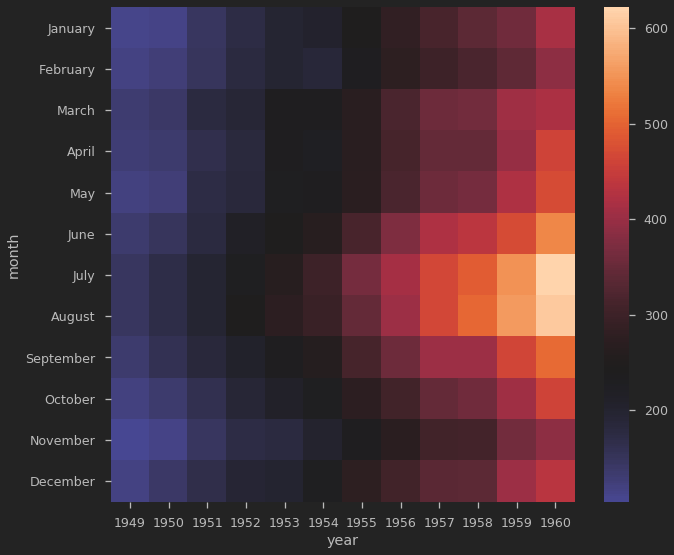

In [77]:
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

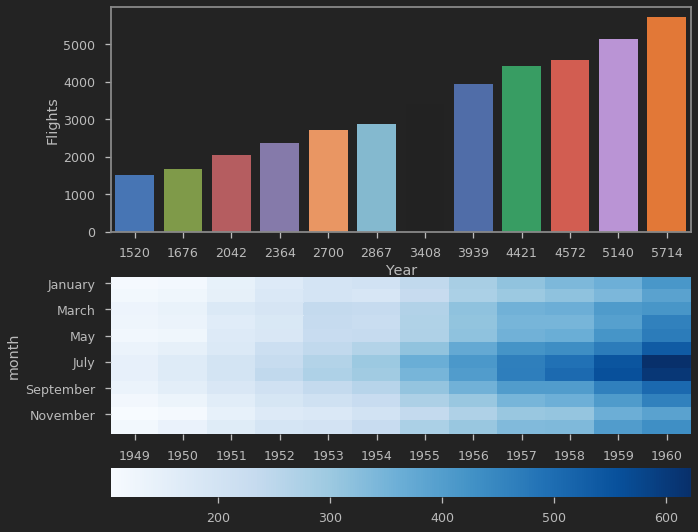

In [78]:
f,(ax1,ax2)=plt.subplots(2,1)

yearly_flights= flight_dframe.sum()
years=pd.Series(yearly_flights.index.values)
years=pd.DataFrame(years)

flights=pd.Series(yearly_flights.values)
years=pd.DataFrame(flights)

year_dframe=pd.concat((years,flights),axis=1)
year_dframe.columns=['Year','Flights']

sns.barplot('Year',y='Flights',data=year_dframe,ax=ax1)
sns.heatmap(flight_dframe,cmap='Blues',ax=ax2,cbar_kws={'orientation':'horizontal'})

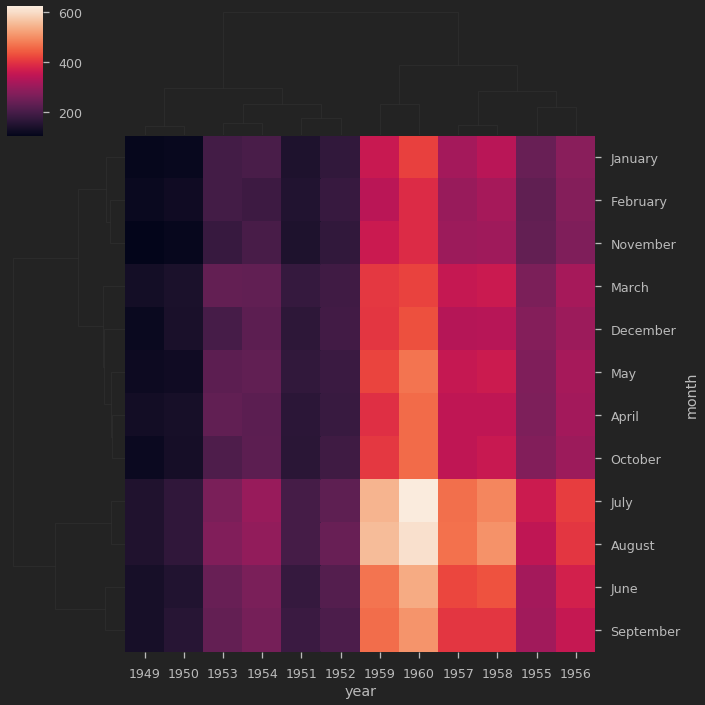

In [79]:
sns.clustermap(flight_dframe)

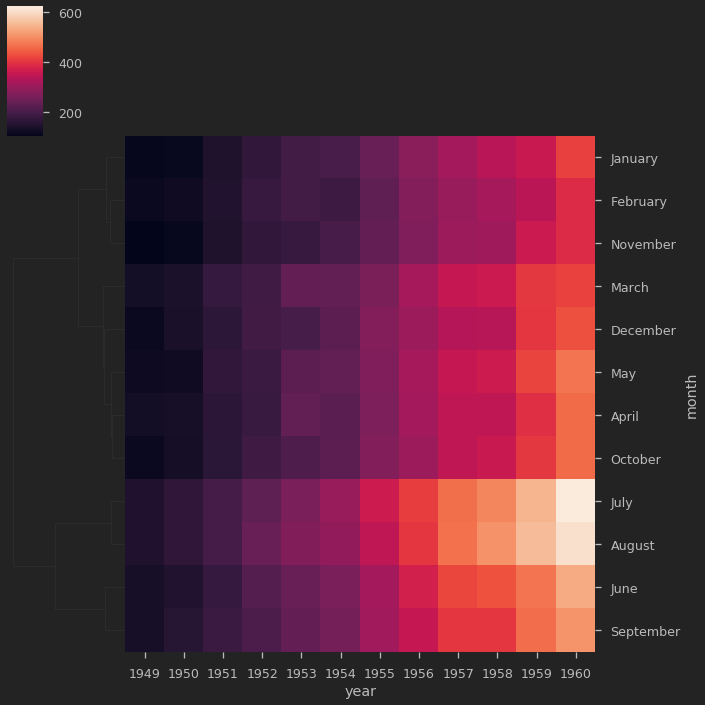

In [80]:
sns.clustermap(flight_dframe,col_cluster=False)

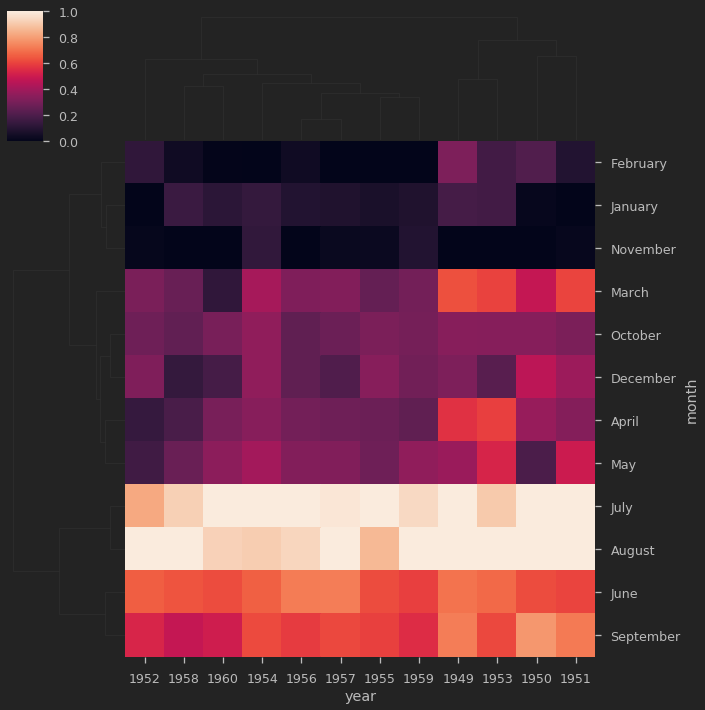

In [82]:
sns.clustermap(flight_dframe,standard_scale=1)

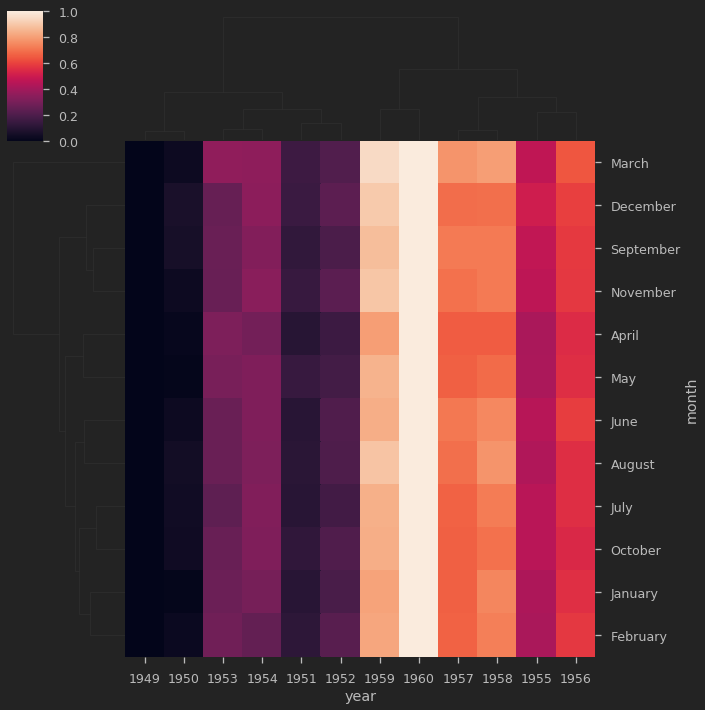

In [83]:
sns.clustermap(flight_dframe,standard_scale=0)

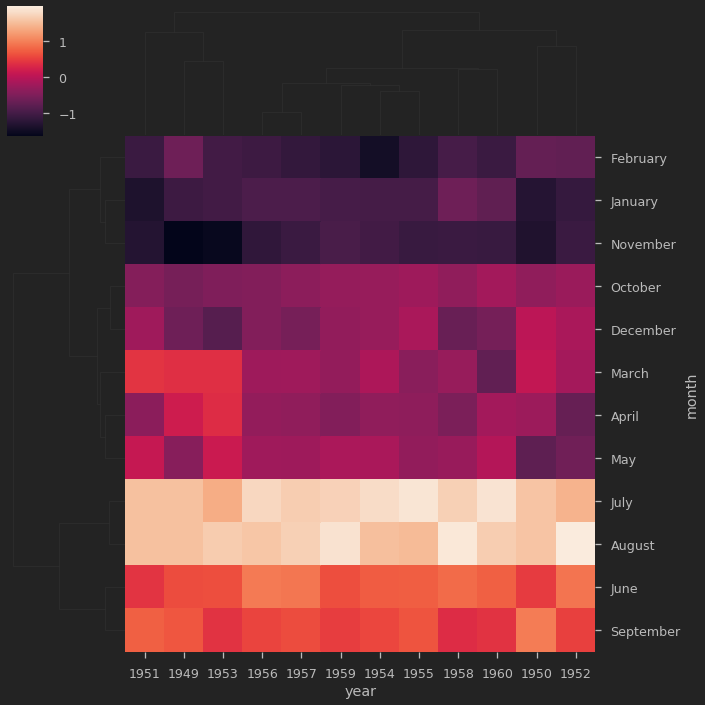

In [84]:
# Make row have mean 0 and var 1
sns.clustermap(flight_dframe,z_score=1)